In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df= pd.read_excel("C:\\data science class\\assignments\\Decision Tree_compl\\heart_disease.xlsx", sheet_name='Heart_disease')
df1= pd.read_excel("C:\\data science class\\assignments\\Decision Tree_compl\\heart_disease.xlsx")

print(df1)
df

         age                                       Age in years
0     Gender                       Gender ; Male - 1, Female -0
1         cp                                    Chest pain type
2   trestbps                             Resting blood pressure
3       chol                                cholesterol measure
4        fbs  (fasting blood sugar > 120 mg/dl) (1 = true; 0...
5    restecg  ecg observation at resting condition,   -- Val...
6     thalch                        maximum heart rate achieved
7      exang                            exercise induced angina
8    oldpeak  ST depression induced by exercise relative to ...
9      slope          the slope of the peak exercise ST segment
10      thal                                               Thal
11       num  target [0=no heart disease; 1,2,3,4 = stages o...


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [2]:
#DATA CLEANING
print(df.isnull().sum())
df.info()

value=df["oldpeak"].median()
df["oldpeak"].fillna(value, inplace=True)
df.isnull().sum()


print(df["exang"].value_counts())
df["exang"]=df["exang"].replace({'TURE':1, "FALSE":0, True:1, False:0})

print(df["exang"].value_counts())

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB
exang
False    516
True     33

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9292\2832233947.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["oldpeak"].fillna(value, inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_9292\2832233947.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["exang"]=df["exang"].replace

In [9]:
#EDA
# Data Types
print(df.dtypes)

df.corr(numeric_only=True)

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang         int64
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object


,age,trestbps,chol,fbs,thalch,exang,oldpeak,num
age,1.000000,0.253999,-0.099967,0.176702,-0.328088,0.192634,0.217942,0.326493
trestbps,0.253999,1.000000,0.117488,0.111614,-0.133360,0.151984,0.134945,0.137251
chol,-0.099967,0.117488,1.000000,-0.113721,0.197907,-0.037019,0.032205,-0.238813
fbs,0.176702,0.111614,-0.113721,1.000000,-0.065428,0.027807,0.008154,0.156268
thalch,-0.328088,-0.133360,0.197907,-0.065428,1.000000,-0.349191,-0.112624,-0.323058
exang,0.192634,0.151984,-0.037019,0.027807,-0.349191,1.000000,0.355955,0.359549
oldpeak,0.217942,0.134945,0.032205,0.008154,-0.112624,0.355955,1.000000,0.406078
num,0.326493,0.137251,-0.238813,0.156268,-0.323058,0.359549,0.406078,1.000000


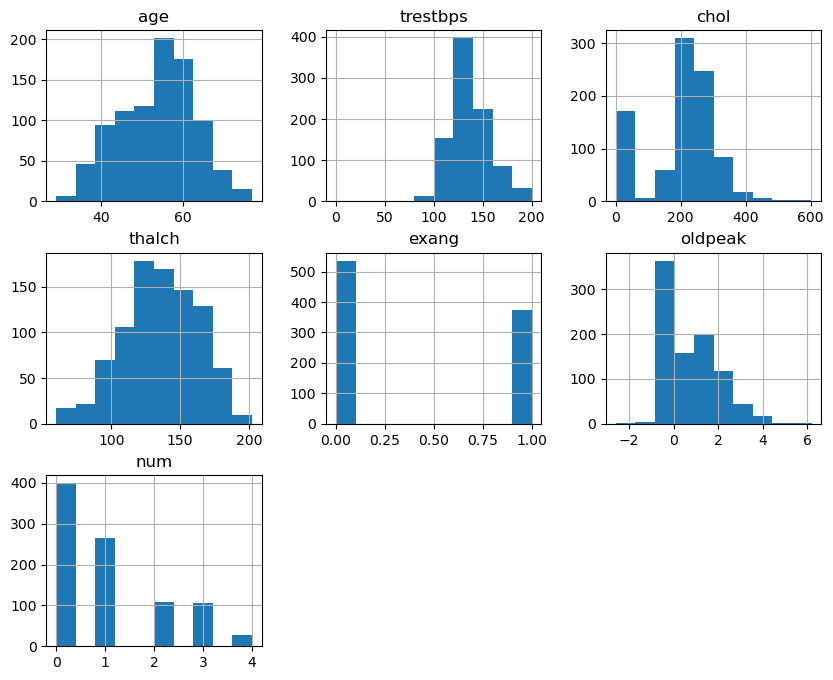

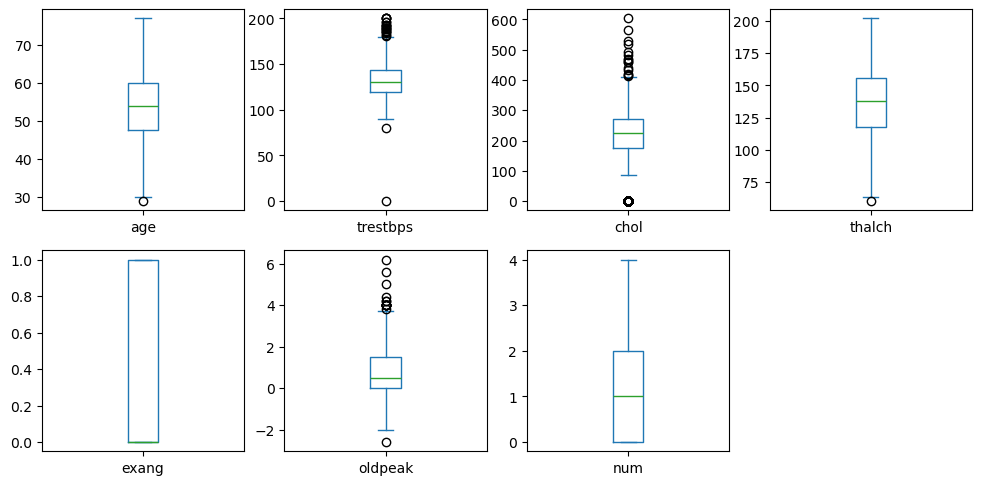

In [17]:
#Histogram
df.hist(figsize= (10,8))
plt.show()

# Boxplot
df.plot(kind='box', subplots=True, layout=(4,4),figsize=(12,12))
plt.show()

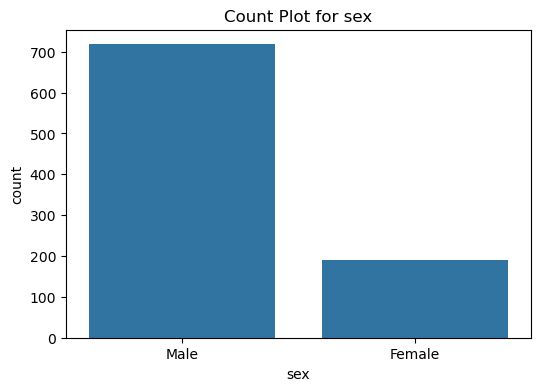

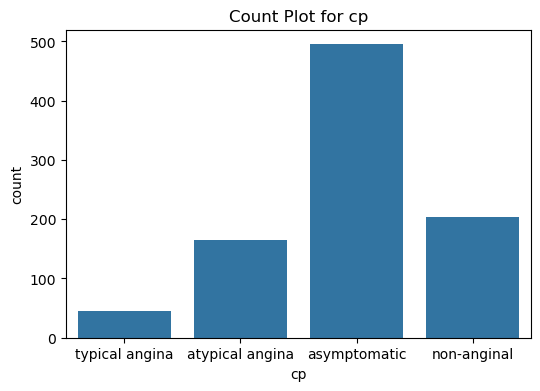

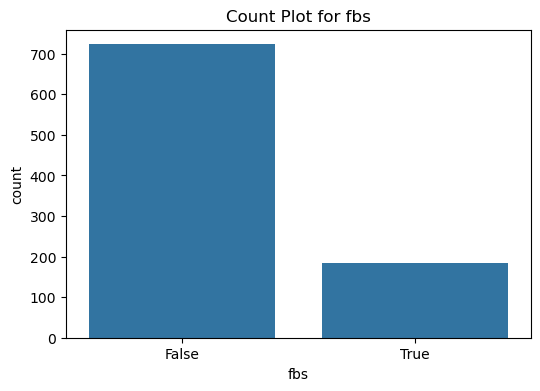

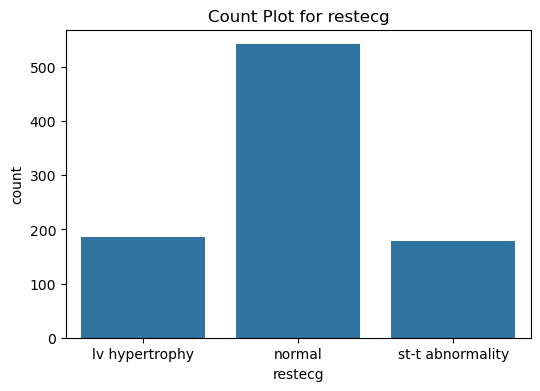

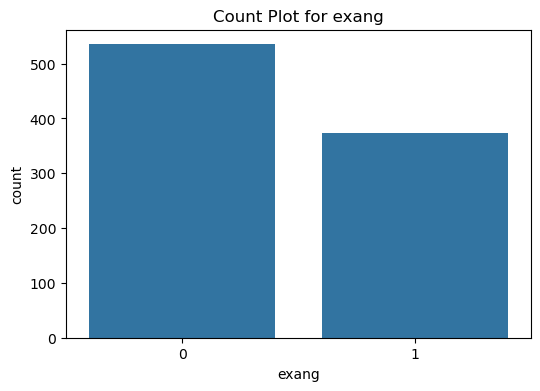

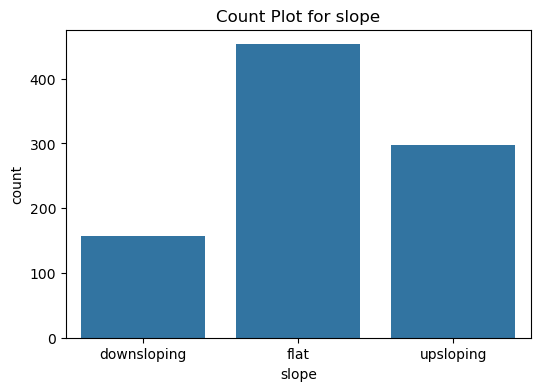

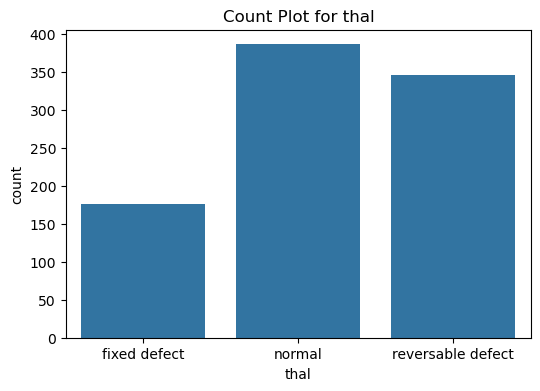

In [18]:
import seaborn as sns
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'] # Replace with actual categorical columns
for col in categorical_cols:
    if col in df.columns:
        plt.figure(figsize=(6, 4))
        sns.countplot(x=col, data=df)
        plt.title(f'Count Plot for {col}')
        plt.show()

In [20]:
#DATA TRANSFORMATION
from sklearn.preprocessing import StandardScaler, LabelEncoder
SS = StandardScaler()
LE = LabelEncoder()
df.info()
cont = df[["trestbps","chol","thalch","oldpeak"]]
nom = df.drop(columns=["age","trestbps","chol" ,"fbs","thalch", "exang", "oldpeak","num"])
SS_cont= SS.fit_transform(cont)
SS_cont =pd.DataFrame(SS_cont)
SS_cont.columns= ["trestbps","chol","thalch","oldpeak"]

LE_fbs= LE.fit_transform(df["fbs"])
LE_fbs=pd.DataFrame(LE_fbs)
LE_fbs.columns=['fbs']

df["exang"]

for col in nom.columns:
    nom[col] = LE.fit_transform(nom[col])
nom    

#make final sheet by adding all columns
df_final = pd.concat([SS_cont,nom,df["exang"],LE_fbs,df["num"]], axis=1)
df_final

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    int64  
 9   oldpeak   908 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(6), object(5)
memory usage: 86.1+ KB


,trestbps,chol,thalch,oldpeak,sex,cp,restecg,slope,thal,exang,fbs,num
0,0.567394,0.281297,0.524183,1.354403,1,3,0,0,0,0,1,0
1,0.076967,0.013526,-0.147705,-0.815718,1,1,1,1,0,0,0,0
2,0.322181,-0.084656,0.449529,-0.438305,1,0,1,1,0,0,0,0
3,-0.756760,-0.138211,2.017268,-0.815718,1,3,0,1,0,0,0,0
4,-1.149102,-0.004325,-0.371668,0.599578,1,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,-0.413461,-1.798388,-0.595631,0.599578,1,0,1,2,2,0,0,4
904,1.597292,-0.281021,-0.595631,2.014874,1,0,2,1,2,1,0,4
905,1.793463,-1.798388,-0.483649,1.543109,1,2,0,0,1,1,0,4
906,0.518352,0.058155,-1.155538,-0.343952,1,2,2,0,0,1,1,4


In [21]:
#Specify features and target variable
X= df_final.drop(columns=["num"])
Y= df_final["num"]

In [22]:
#DATA PARTITION
from sklearn.model_selection import train_test_split
X_Train,X_Test, Y_Train,Y_Test=train_test_split(X,Y,test_size=0.2, random_state=42)

In [23]:
#model building

from sklearn.tree import DecisionTreeClassifier   # decision tree regressor
model = DecisionTreeClassifier(criterion='gini') # entropy
model.fit(X_Train,Y_Train)

Y_pred_train = model.predict(X_Train)
Y_pred_test = model.predict(X_Test)

from sklearn.metrics import accuracy_score, log_loss
training_accuracy  = accuracy_score(Y_Train,Y_pred_train)
test_accuracy  = accuracy_score(Y_Test,Y_pred_test)

print("trianing accuracy:", np.round(training_accuracy,2))
print("test accuracy:", np.round(test_accuracy,2))

trianing accuracy: 1.0
test accuracy: 0.48


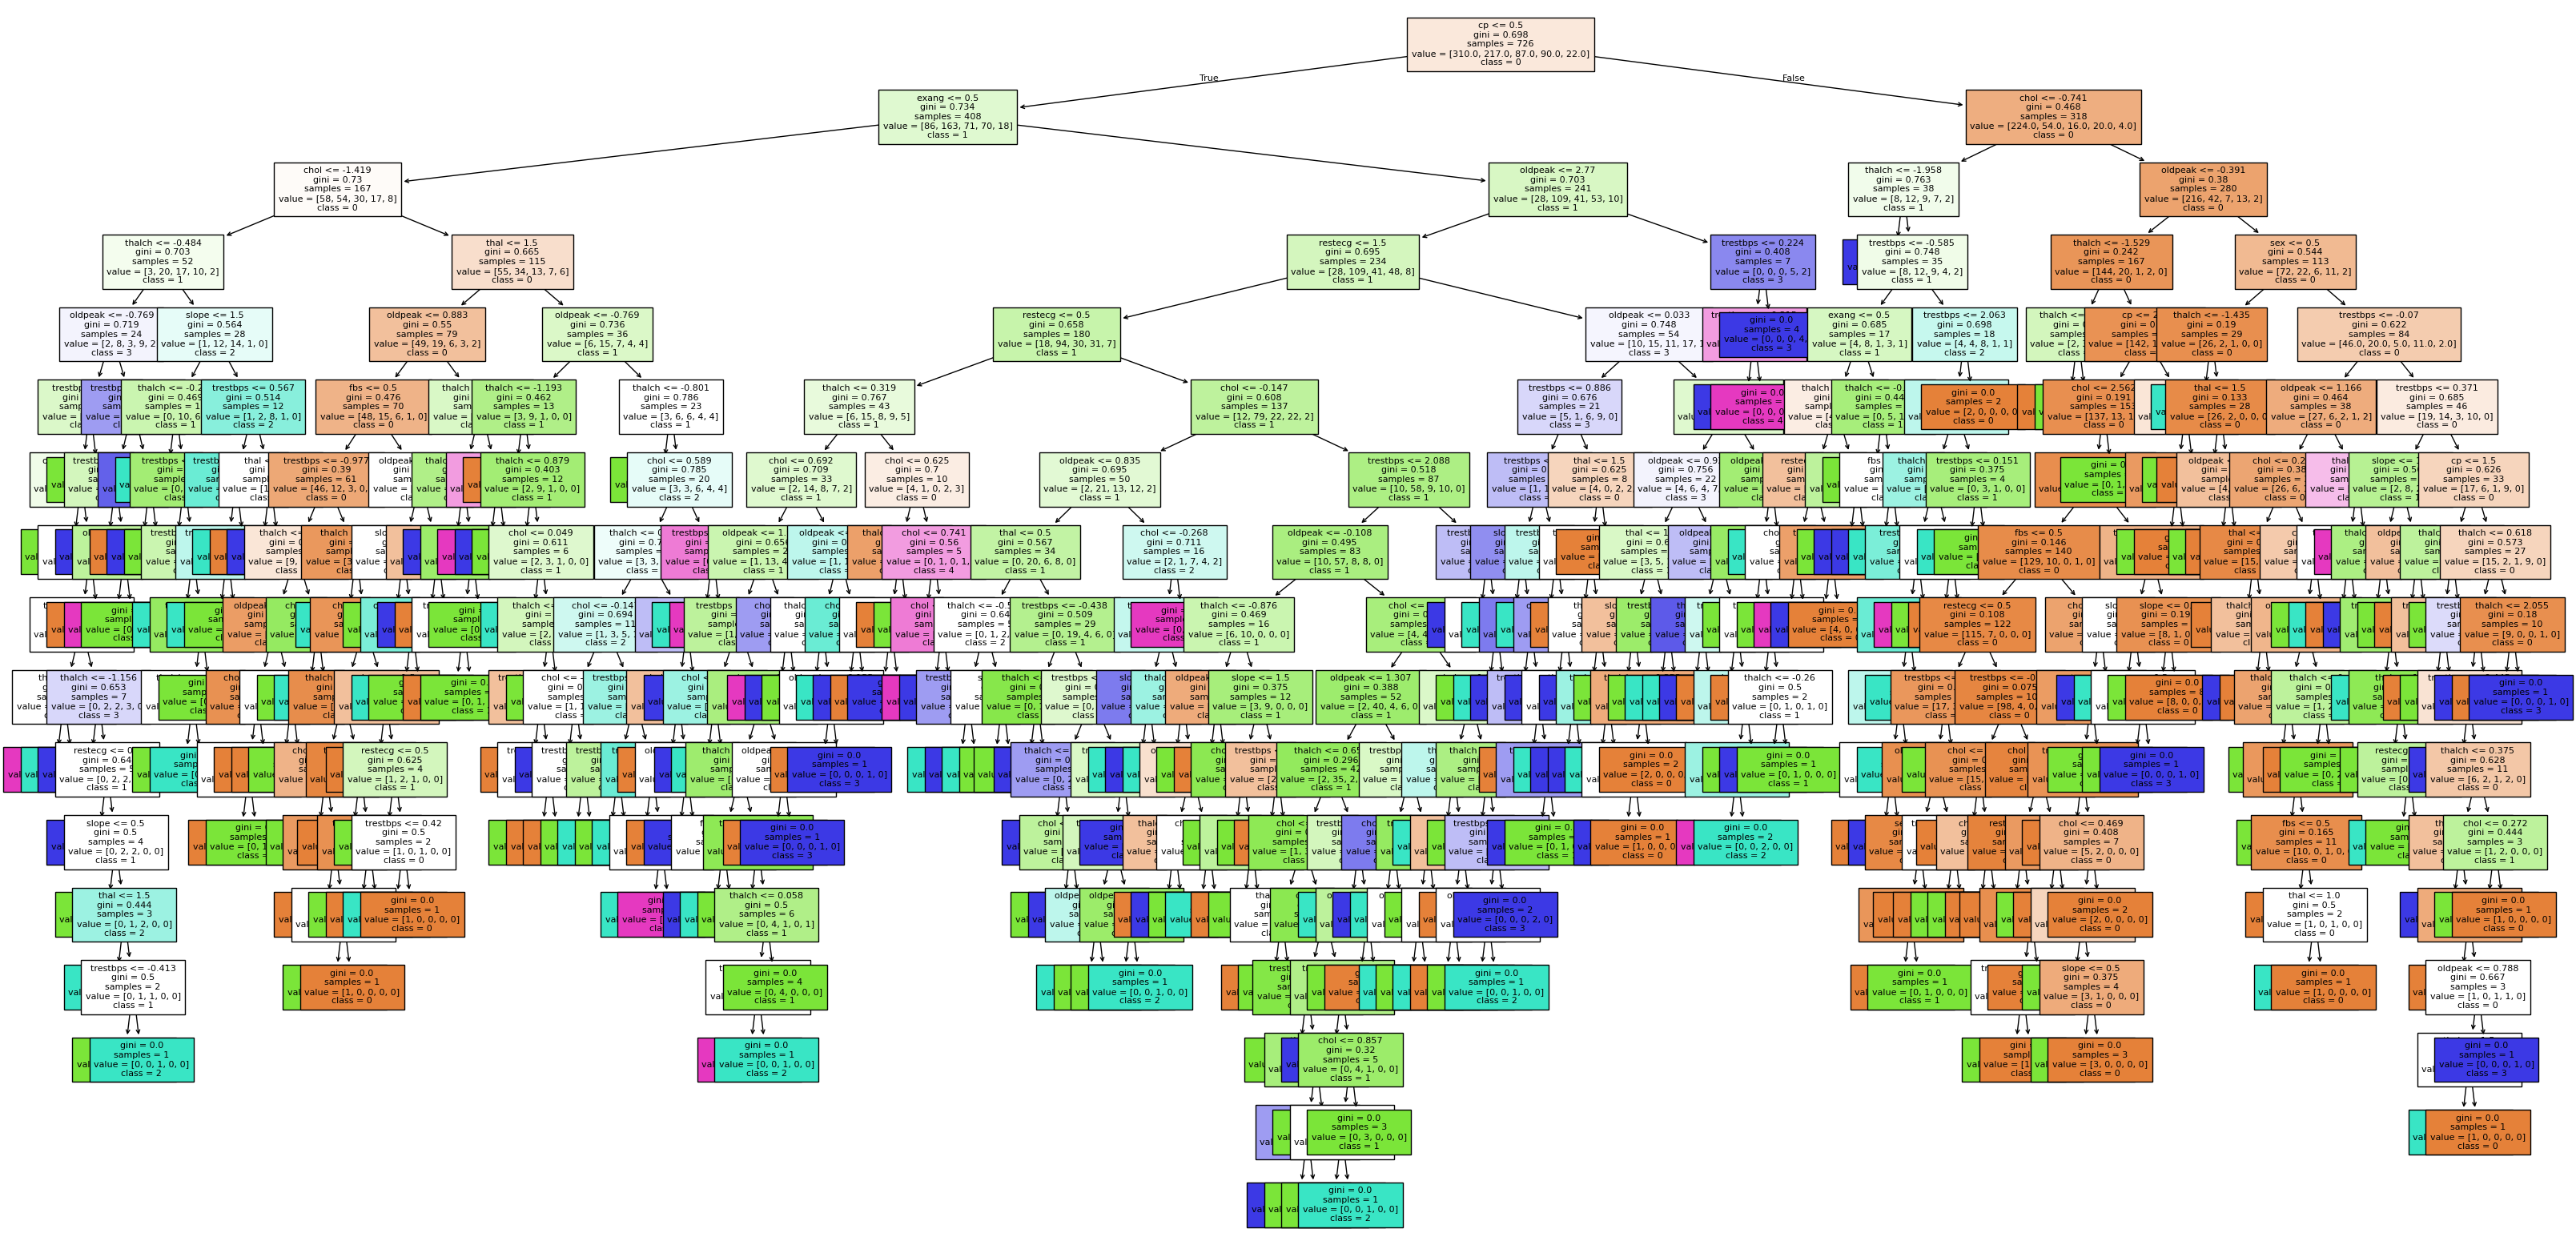

In [27]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(40, 20))  # Adjust figure size as needed to make it smaller
plot_tree(model, filled=True, feature_names=X.columns, class_names=[str(c) for c in model.classes_], fontsize=8) # Adjust fontsize
plt.show()

In [33]:
#CROSS VALIDATION
#=============================================================
# shuffle split
#=============================================================
training_accracy = []
test_accuracy = []

for i in range(1, 501):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.30, random_state=i, stratify=Y)
    model = DecisionTreeClassifier(criterion='gini',max_depth=5, min_samples_split=2) # 'entropy'
    model.fit(X_train,Y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test  = model.predict(X_test)
    training_accracy.append(accuracy_score(Y_train,y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,y_pred_test))
   
print("Cross validation: Training accuracy score:", np.round(np.mean(training_accracy),2))
print("Cross validation: Test accuracy score:", np.round(np.mean(test_accuracy),2))

from sklearn.tree import DecisionTreeClassifier

# Assuming 'model' is your trained DecisionTreeClassifier
n_nodes = model.tree_.node_count
depth = model.tree_.max_depth

print(f"Number of nodes: {n_nodes}")
print(f"Depth of the tree: {depth}")

Cross validation: Training accuracy score: 0.65
Cross validation: Test accuracy score: 0.53
Number of nodes: 57
Depth of the tree: 5


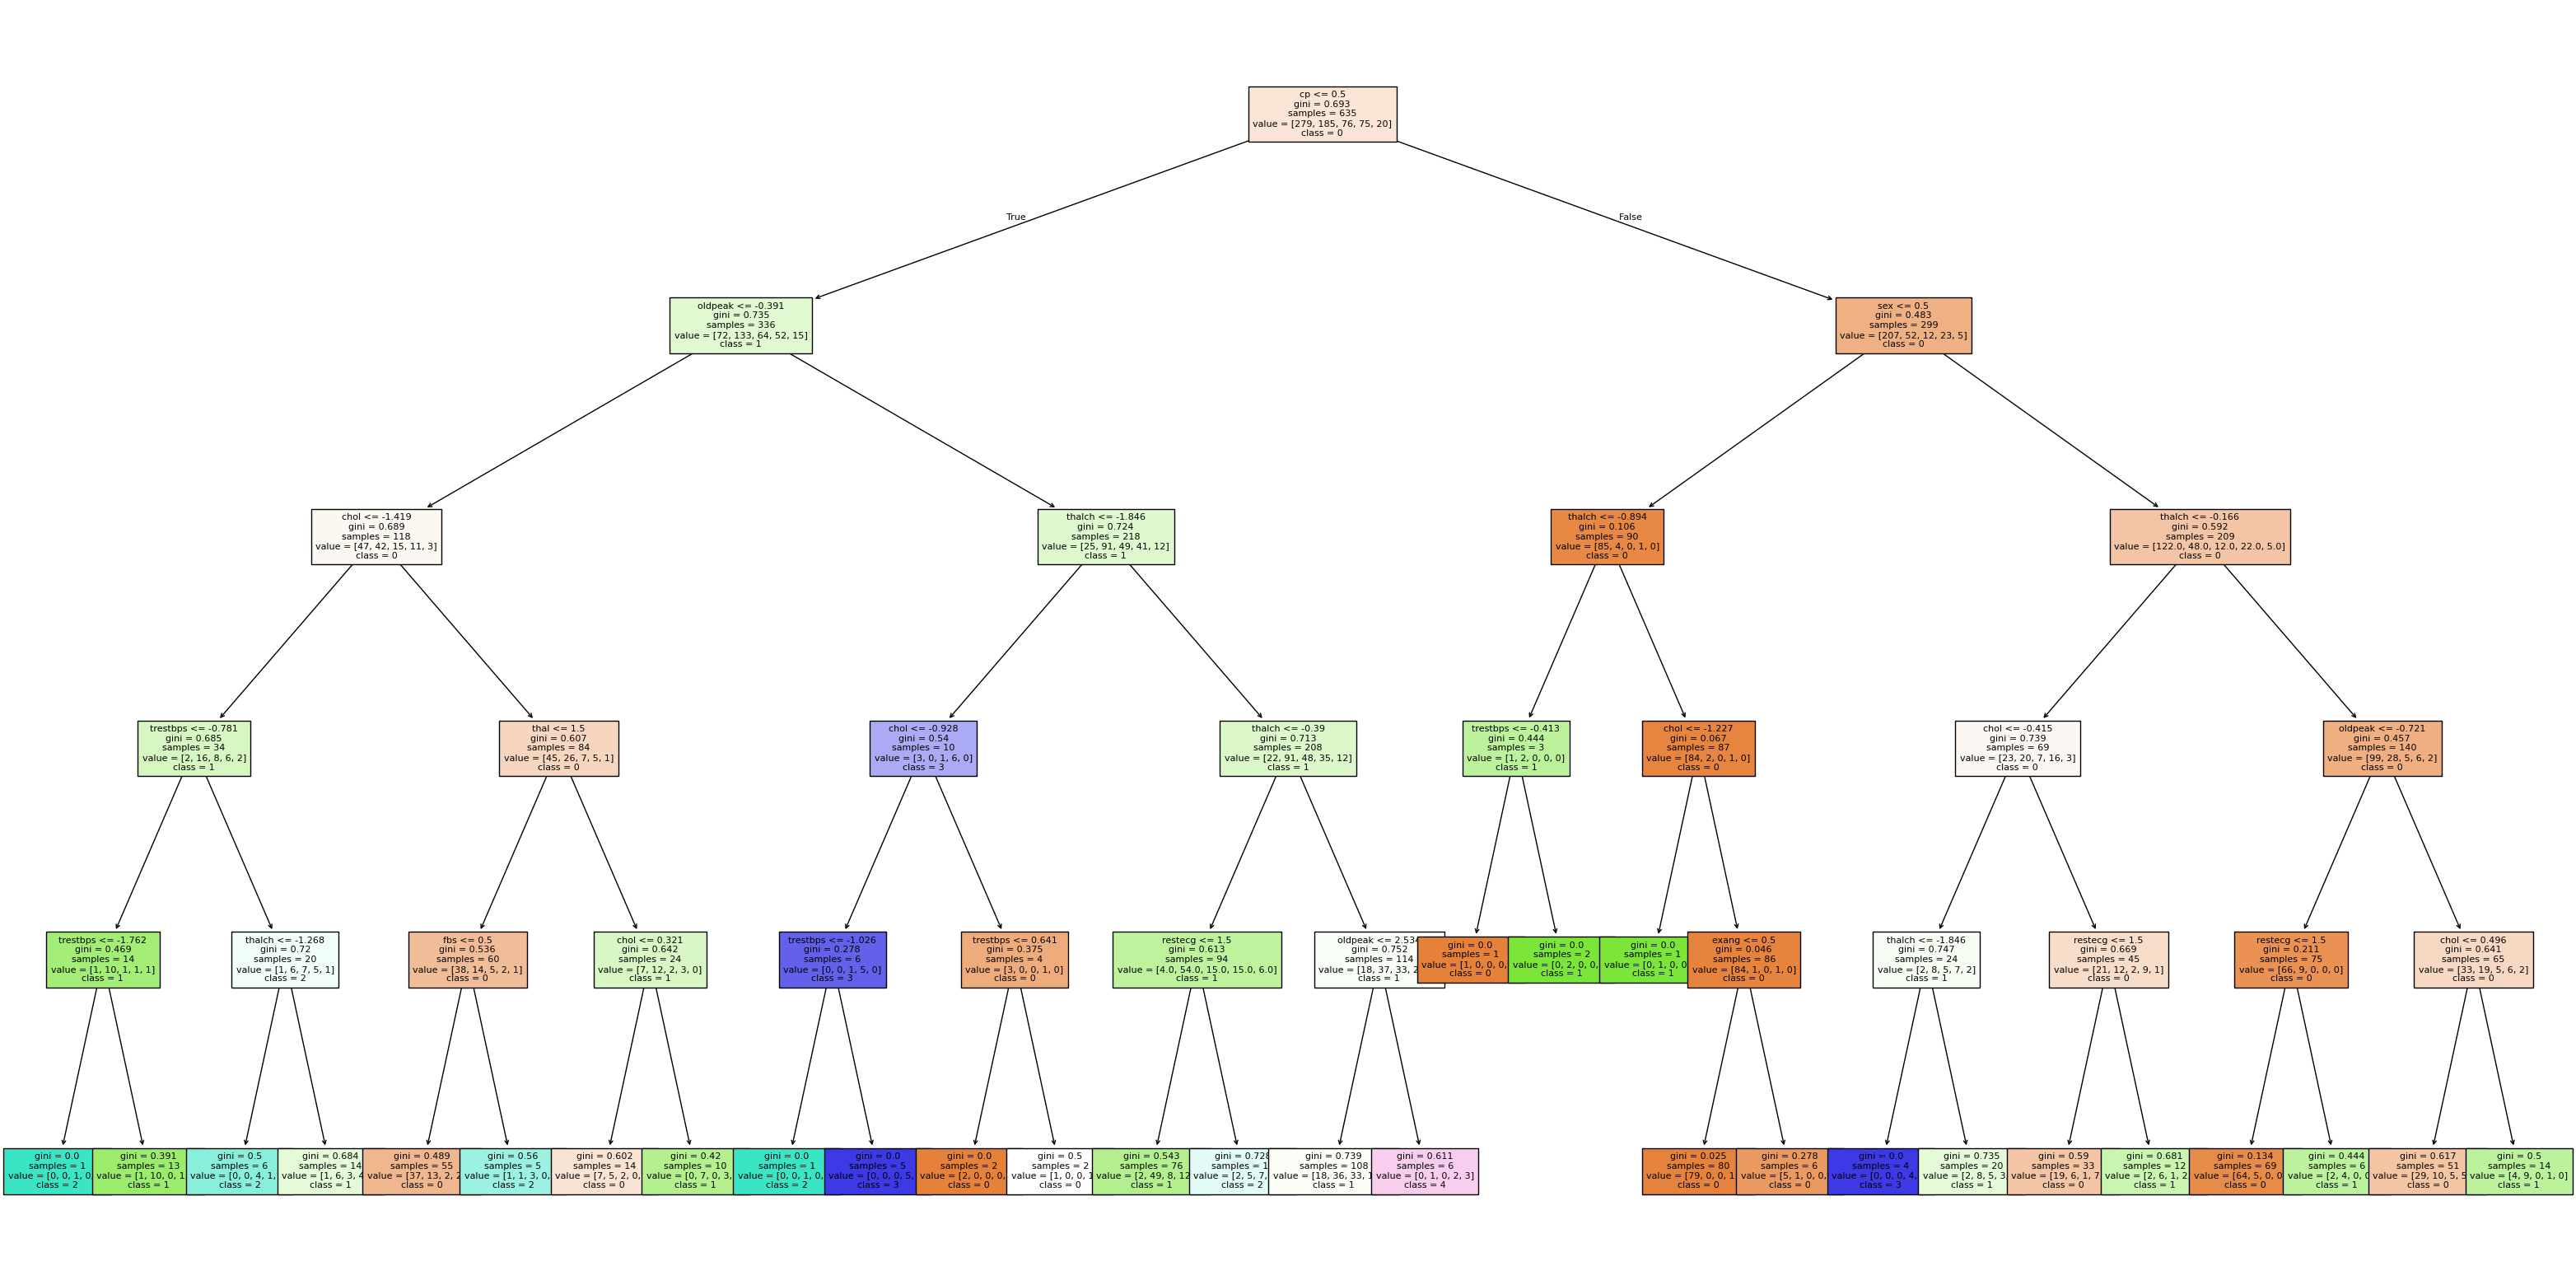

In [34]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(40, 20))  # Adjust figure size as needed to make it smaller
plot_tree(model, filled=True, feature_names=X.columns, class_names=[str(c) for c in model.classes_], fontsize=8) # Adjust fontsize
plt.show()

In [50]:
'''
in this model when max depth = 7 
Cross validation: Training accuracy score: 0.75
Cross validation: Test accuracy score: 0.51
Number of nodes: 149

in this model when max depth = 6 
Cross validation: Training accuracy score: 0.7
Cross validation: Test accuracy score: 0.52
Number of nodes: 99

in this model when max depth = 5 
Cross validation: Training accuracy score: 0.65
Cross validation: Test accuracy score: 0.53
Number of nodes: 57

As depth increases beyond 5, test accuracy decreases, showing signs of overfitting.
Best test accuracy is at max depth 5 is 0.53, meaning it's the most goode model.
'''

'\nin this model when max depth = 7 \nCross validation: Training accuracy score: 0.75\nCross validation: Test accuracy score: 0.51\nNumber of nodes: 149\n\nin this model when max depth = 6 \nCross validation: Training accuracy score: 0.7\nCross validation: Test accuracy score: 0.52\nNumber of nodes: 99\n\nin this model when max depth = 5 \nCross validation: Training accuracy score: 0.65\nCross validation: Test accuracy score: 0.53\nNumber of nodes: 57\n\nin this model when max depth = 4 \nCross validation: Training accuracy score: 0.61\nCross validation: Test accuracy score: 0.54\nNumber of nodes: 31\n\n'

In [ ]:
1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
max_depth-(Maximum depth of the tree)
    Limits complexity. Prevents overfitting if too deep; too shallow may underfit.
min_samples_split-Minimum number of samples required to split a node
    Increases bias if too high; smaller trees. Helps prevent overfitting.
max_features-	Number of features to consider when looking for best split (especially in Random Forests)
    Adds randomness; reduces overfitting in ensembles.
criterion-Function to measure quality of a split: 'gini' or 'entropy
    Affects how the tree chooses splits. 'gini' is faster; 'entropy' is more informative but slower.

2. What is the difference between the Label encoding and One-hot encoding?
    Label Encoding-
        1.Assigns each category a unique integer
        2.Implies ordinal relationship (which may be misleading)
        3.Categories have true order (e.g., low < medium < high)
        4. The encoding used when column data is categorical
        5. after applying label encoding you get 0,1,2,3,4 in one column
        
    One-Hot Encoding-
        1.Creates a binary column for each category
        2.No implied order; all categories are equally distinct
        3.Categories are nominal (no order, e.g., color, city)
        4.The encoding used when column data is categorical
        5. after applying one hot encoding you get sepreate column  for each value like 0 and 1